(512, 512, 3)
(512, 512)


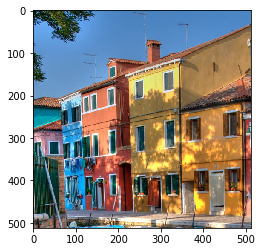

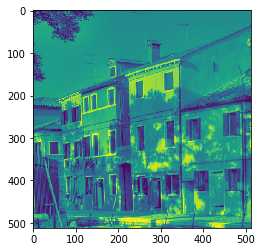

In [33]:
from scipy import misc
f = misc.imread('house.png', flatten=False, mode='RGB')
f_prime =misc.imread('house.png',flatten=False, mode= 'F')

print(f.shape)
print(f_prime.shape)
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

plt.imshow(f_prime)
plt.show()

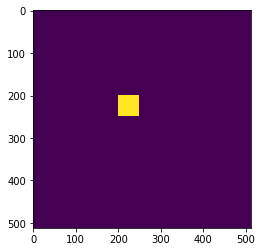

In [19]:
import numpy as np 
img = np.zeros((512,512))
img[200:250, 200:250]=1

plt.imshow(img)
plt.show()

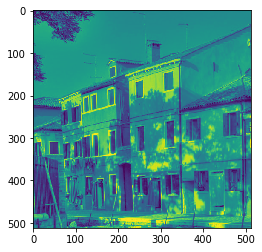

array([[  19.,   20.,   14., ...,  123.,  124.,  124.],
       [  23.,   17.,   14., ...,  123.,  123.,  123.],
       [  26.,   16.,   18., ...,  123.,  123.,  123.],
       ..., 
       [ 112.,  104.,  121., ...,  110.,  115.,  122.],
       [ 111.,  101.,  127., ...,  126.,  127.,  130.],
       [ 115.,  106.,  137., ...,  128.,  129.,  133.]], dtype=float32)

In [21]:
import numpy as np 

#faux
def requantification(image, N):
    J= np.ceil(image*N)
    plt.imshow(J)
    plt.show()
    return J
requantification(f_prime, 1)

In [22]:
f_prime

array([[  18.77300072,   19.17000008,   13.01099968, ...,  122.92199707,
         123.29199982,  123.29199982],
       [  22.07600021,   16.02799988,   13.5010004 , ...,  122.92199707,
         122.69400024,  122.69400024],
       [  25.07999992,   15.84300041,   17.02300072, ...,  122.92199707,
         122.92199707,  122.92199707],
       ..., 
       [ 111.13500214,  103.19499969,  120.96700287, ...,  109.5739975 ,
         114.5739975 ,  121.5739975 ],
       [ 110.87400055,  100.64600372,  126.2440033 , ...,  125.00800323,
         126.00800323,  129.00799561],
       [ 114.86299896,  105.93399811,  136.64599609, ...,  127.04000092,
         128.03999329,  132.03999329]], dtype=float32)

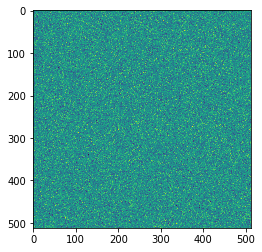

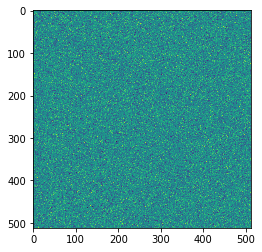

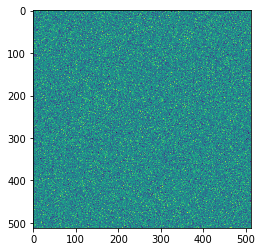

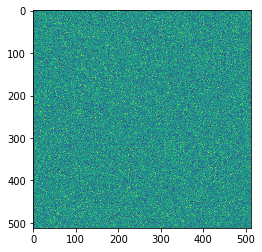

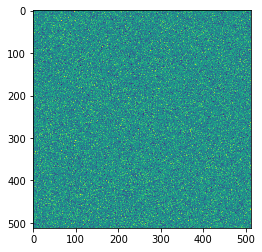

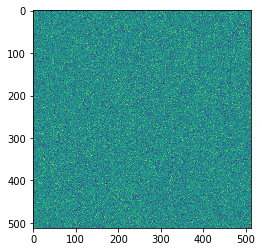

In [30]:
img_bruit= np.zeros((512,512))
mu =1/2
for sigma in [0.01, 1 , 2 , 3 , 10, 1000]:
        img_bruit = np.random.normal(mu, sigma, (512,512))
        plt.imshow(img_bruit)
        plt.show()
        

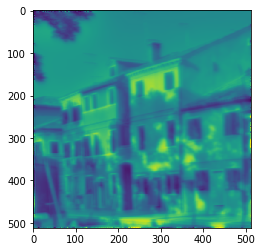

In [35]:
import numpy as np

def division(a,b ):
    return a/b
 
def carre (x):
    return x*x

def f_gauss(z, sigma) :
    return np.exp(division(-np.power(z,2),2*carre(sigma)))

def bordure_image(image, bord):
    image2= np.zeros((image.shape[0]+2*bord, image.shape[1]+2*bord, image.shape[2] ))
    image2[bord:,bord:,:]= image
    return image2

def division(a,b ):
    return a/b    

def u_denoised(p1, p2, w, u,sigma_i, sigma_s):
    u_noised =0
    constante = 0
    for i in range(0,2*w+1):   # espace où est définit x1 et x2 , suite au changement de variable 
        for j in range(0,2*w+1):
           
            u_noised = u_noised + np.exp(division(-carre(i-w-1)-carre(j-w-1),2*carre(sigma_s))) * u[i+p1-w-1, j+p2-w-1] * f_gauss(u[i+p1-w-1, j+p2-w-1]-u[p1, p2] , sigma_i)
            constante = constante + np.exp(division(-carre(i-w-1)-carre(j-w-1),2*carre(sigma_s)))* f_gauss(u[i+p1-w-1, j+p2-w-1]-u[p1, p2] , sigma_i)

    return u_noised * 1/constante   

  
def apply_u_denoised(image, w, sigma_s, sigma_i ):
    image_noised= np.zeros(image.shape)
    image_noised = image
    
    for i in range(w+1, image.shape[0] - w+1):  # respecter espace de definition de p1 et p2
        for j in range(w+1, image.shape[1]-w+1):
            image_noised[i,j] = u_denoised(i, j, w, image , sigma_i, sigma_s)  
    plt.imshow(image_noised)
    plt.show()  
    return image_noised

im_noised =apply_u_noised(f_prime, 4, 1000, 10000)
            
    


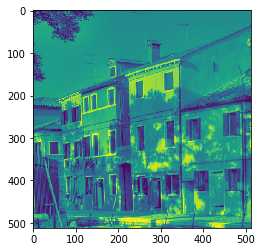

In [34]:
plt.imshow(f_prime)
plt.show()

In [36]:
print(u_noised(44, 100, 8, f_prime, 1000, 1000))    


60.9394069288
